In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Defined rmsle function
def rmsle(y_true, y_pred):
  #Added this line as I was getting RuntimeWarning: invalid value encountered in log1p
    y_pred = np.maximum(y_pred, 0)
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))

df = pd.read_csv('/home/cloud/Downloads/bike_train.csv')

# Parse datetime column
df['datetime'] = pd.to_datetime(df['datetime'])

In [26]:
# Q1 Examine dataset size, missing values, and feature types.
#Answer: Printed the details below
print("Dataset Shape:", df.shape)
print("\nFeature Types and Missing Values:")
print(df.info())
print("\nMissing Values Count:")
print(df.isnull().sum())


Dataset Shape: (10450, 12)

Feature Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10450 entries, 0 to 10449
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10450 non-null  datetime64[ns]
 1   season      10450 non-null  int64         
 2   holiday     10450 non-null  int64         
 3   workingday  10450 non-null  int64         
 4   weather     10450 non-null  int64         
 5   temp        10450 non-null  float64       
 6   atemp       10450 non-null  float64       
 7   humidity    10450 non-null  int64         
 8   windspeed   10450 non-null  float64       
 9   casual      10450 non-null  int64         
 10  registered  10450 non-null  int64         
 11  count       10450 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 979.8 KB
None

Missing Values Count:
datetime      0
season        0
holiday       0
workingday

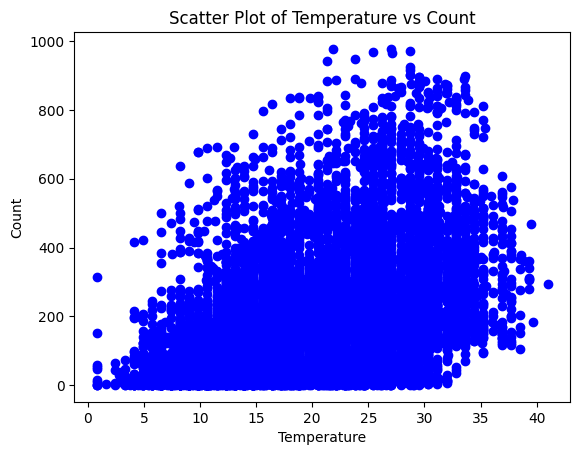

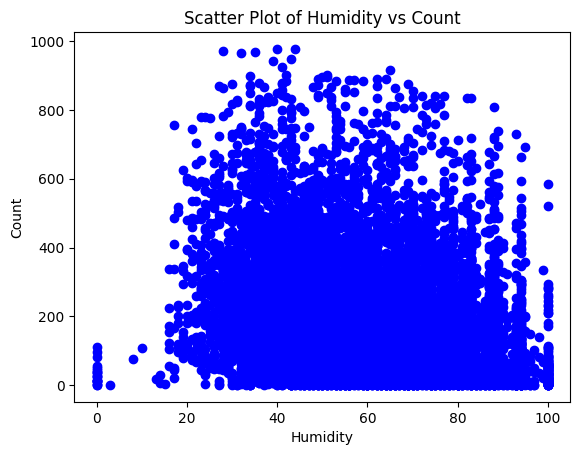

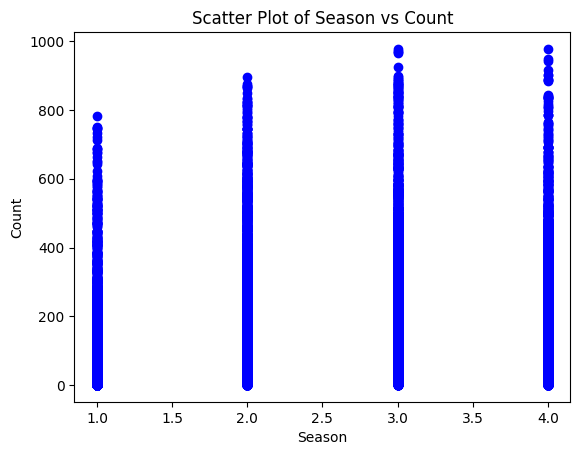

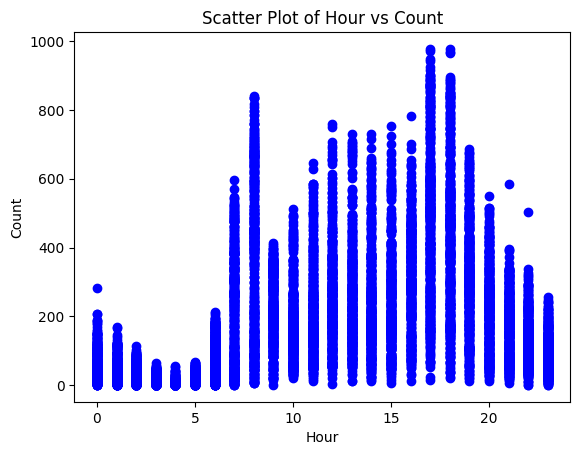

In [28]:
# Q2 Visualize relationships between key features and the target variable (count).
#Answer: Using co-relation between features and output that we get in answer to Q3, plotting relations between important features and count here

# Extract 'hour' for visualization as time of day is crucial, from Q4
df['hour'] = df['datetime'].dt.hour

y = df['count']

x = df['temp']
plt.scatter(x, y, color = 'blue')
plt.title('Scatter Plot of Temperature vs Count')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

x = df['humidity']
plt.scatter(x, y, color = 'blue')
plt.title('Scatter Plot of Humidity vs Count')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()

x = df['season']
plt.scatter(x, y, color = 'blue')
plt.title('Scatter Plot of Season vs Count')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

x = df['hour']
plt.scatter(x, y, color = 'blue')
plt.title('Scatter Plot of Hour vs Count')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()



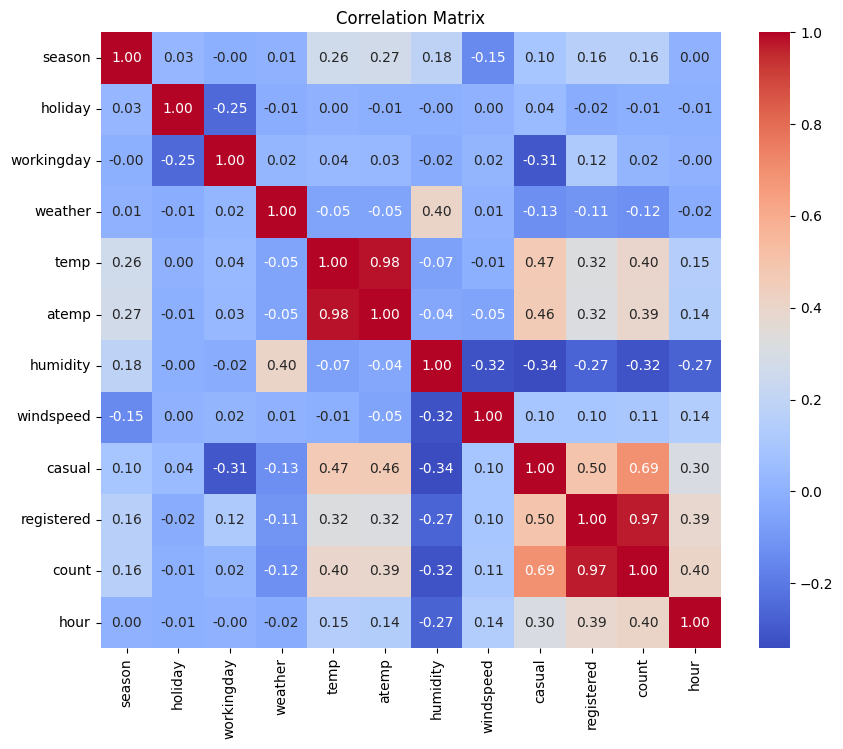

Most informative correlations with 'count':
count         1.000000
registered    0.970108
casual        0.691971
hour          0.404188
temp          0.396451
atemp         0.390642
season        0.160333
windspeed     0.105318
workingday    0.017361
holiday      -0.005615
weather      -0.124402
humidity     -0.316607
Name: count, dtype: float64


In [32]:
# Q3 Suggest which variables are likely to be most informative.
# Answer: According to this correlation matrix, imformative features are infered. Namely hour, temp, season.  casual and registered
# show high correlation, but are just a segregation of count column. Hence, not informative.
import seaborn as sns
plt.figure(figsize=(10, 8))
# Drop datetime for correlation calculation.
correlation = df.drop(['datetime'], axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

print("Most informative correlations with 'count':")
print(correlation['count'].sort_values(ascending=False))

In [34]:
# Q4. You can try to derive features from datetime (hour, weekday, month, season), encode
#categorical variables, consider transformations to capture nonlinear trends to improve
#your model performance

# Features extracted from datatime column
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['year'] = df['datetime'].dt.year

# 'datetime' is no longer needed after extraction of useful features
X = df.drop(['count', 'casual', 'registered', 'datetime'], axis=1)
y = df['count']

# One-Hot Encode used on categorical data
X = pd.get_dummies(X, columns=['season', 'holiday', 'workingday','weather'])

print("Feature set columns after engineering:")
print(X.columns)

Feature set columns after engineering:
Index(['temp', 'atemp', 'humidity', 'windspeed', 'hour', 'month', 'day',
       'year', 'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0',
       'holiday_1', 'workingday_0', 'workingday_1', 'weather_1', 'weather_2',
       'weather_3', 'weather_4'],
      dtype='object')


In [40]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 145.8 MB/s eta 0:00:0000:01


In [42]:
# Q5 Split data into training and validation sets and build a simple Linear Regression model.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate using RMSLE
score_lr = rmsle(y_test, y_pred_lr)
print(f"Linear Regression RMSLE: {score_lr:.4f}")


Linear Regression RMSLE: 1.2928


In [44]:
# Q6 To improve model performance, you may try to:
#  Extend feature space using polynomial transformations (degree 2 or 3)
#  Apply Ridge and Lasso regression on polynomial features, Tune the regularization
# strength (α).

#Answer - Polynomial of degree 3 working best. Increasing degree further,
#has not returned substantially better results. Same with alpha, alpha = 1
#is giving the best overall result and increasing or decreasing it either
#worsens rmsle or gives negligiblly better result. So, continuing with
#these values.

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso
# Polynomial Features (Degree 3)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)
a = 0.1
ridge_model = Ridge(alpha=a)
ridge_model.fit(X_train_scaled,np.log1p(y_train))

preds_log = ridge_model.predict(X_test_scaled)
y_pred_ridge = np.expm1(preds_log)

score_ridge = rmsle(y_test, y_pred_ridge)
print(f"For Ridge - Alpha: {a} -> RMSLE: {score_ridge:.4f}")

model_lasso = Lasso(alpha=a)
model_lasso.fit(X_train_scaled,np.log1p(y_train))

preds_log = model_lasso.predict(X_test_scaled)
y_pred_lasso = np.expm1(preds_log)

score_lasso = rmsle(y_test, y_pred_lasso)
print(f"For Lasso - Alpha: {a} -> RMSLE: {score_lasso:.4f}")


For Ridge - Alpha: 0.1 -> RMSLE: 0.7954
For Lasso - Alpha: 0.1 -> RMSLE: 0.9958


In [46]:
# Q7 Summarize all results (of different models tried out) in one table (RMSLE, key
#observations).
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Ridge', 'Polynomial Lasso'],
    'RMSLE': [score_lr, score_ridge, score_lasso]
})
print(results)


               Model     RMSLE
0  Linear Regression  1.292842
1   Polynomial Ridge  0.795368
2   Polynomial Lasso  0.995750


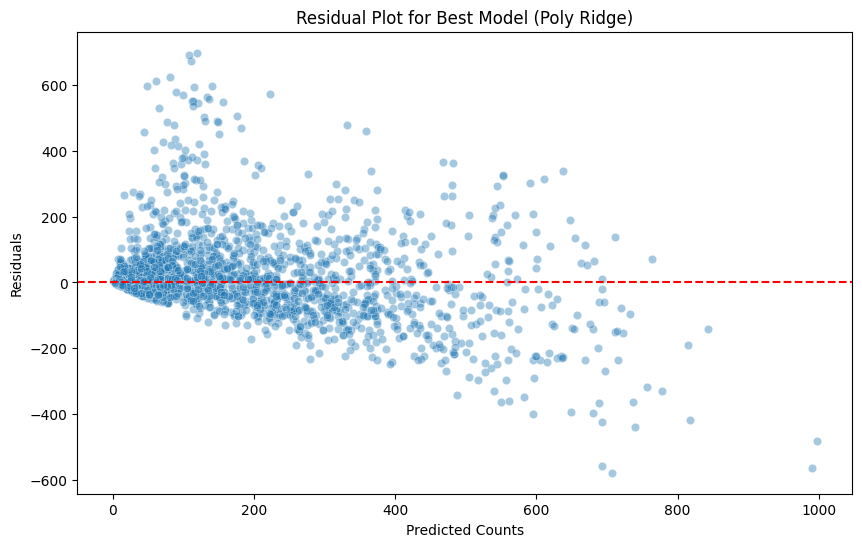

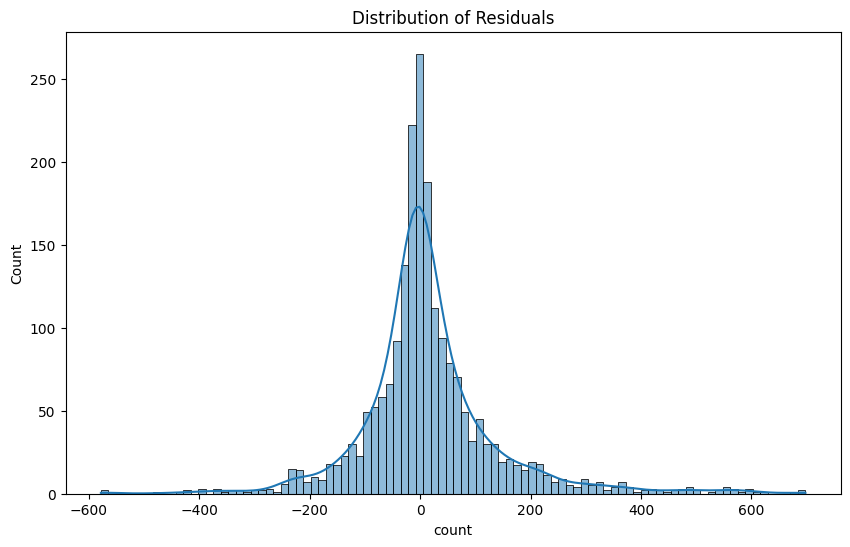

In [48]:
# Q8  Plot residuals for the best model.
# Ridge was the best with lowest rmsle

best_pred = y_pred_ridge
residuals = y_test - best_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=best_pred, y=residuals, alpha=0.4)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Counts')
plt.ylabel('Residuals')
plt.title('Residual Plot for Best Model (Poly Ridge)')
plt.show()

# Optional: Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

Q9. Explain why the winning model performs better.

Answer: The Polynomial Ridge model likely performs better than simple Linear Regression because the relationship between features like hour or temp and the demand count is non-linear. A simple linear line cannot fit this curve. Polynomial features introduce curvature that allows the model to fit these complex patterns.Regularization (Ridge/Lasso) helps prevent overfitting, which is a risk when adding many polynomial features.

Q10. Why does RMSLE penalize under-predictions more gently than RMSE?

Answer: RMSLE applies a logarithm to the predictions and actual values before calculating the error. The graph of log(x) grows slower as x increases. Logarithmic scale compresses large errors and hence it appears to penalise under-predictions more gently than RMSE.

Q11. What are the trade-offs between model simplicity and predictive power?

Answer: Simplicity in case of Simple Linear Regression: These models are easy to interpret, fast to train, and less prone to overfitting. However, they often have high bias because they cannot capture complex, non-linear relationships in real-world data, leading to lower predictive power.

Predictive Power in case of Poly Regression: Complex models can capture intricate patterns (low bias) and result in better accuracy. However, they are harder to interpret, take longer to train, and have a higher risk of overfitting (high variance) if not properly regularized.

Q12. Why can't Linear Regression alone capture time-of-day effects effectively?

Answer: Linear regression assumes a monotonic relationship i.e as X goes up, Y goes up OR down.

The time-of-day  effect on bike rentals is cyclical. Rentals might be low at 4 AM, high at 8 AM, low at 2 PM, high at 5 PM, and low again at 10 PM.

A straight line cannot go up and down multiple times; it can only slope in one direction. Therefore, simple linear regression on the raw hour feature will fail to capture these peaks and troughs.

In [56]:
!pip install pa

In [54]:


test_df_raw = pd.read_csv('/home/cloud/Downloads/bike_test.csv')
test_df = test_df_raw.copy()
test_df['datetime'] = pd.to_datetime(test_df['datetime'], format="%d-%m-%Y %H:%M")
test_df['hour'] = test_df['datetime'].dt.hour
test_df['month'] = test_df['datetime'].dt.month
test_df['day'] = test_df['datetime'].dt.day
test_df['year'] = test_df['datetime'].dt.year

X_test = test_df.drop([ 'datetime'], axis=1)

X_test = pd.get_dummies(X_test, columns=['season', 'holiday', 'workingday','weather'])
X_test['weather_4'] = 0

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

preds_log = ridge_model.predict(X_test_scaled)
y_pred_ridge = np.expm1(preds_log)
test_df_raw['count_predicted'] = y_pred_ridge
output_df = test_df_raw[['datetime', 'count_predicted']]
output_df
output_df.to_csv('submission.csv', index=False)
